In [74]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [75]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [76]:
with open(f'ptv_result_A_test.pickle', mode='rb') as fp:
    ptv_result = pickle.load(fp)

In [77]:
ptv_result = ptv_result.sort_values(by='y', ascending=True).values

In [78]:
x = np.linspace(0, 2000, 50)
y = np.linspace(0, 1100, 50)
xx, yy = np.meshgrid(x, y)

u = np.zeros([50, 50])
v = np.zeros([50, 50])

In [79]:
sigma = 1.24 * np.sqrt(50**2 / 34011)

In [82]:
for j in range(0, 50):
    upper_limit = ptv_result[np.where(ptv_result[:, 1] >= 1100 // 50 * j)]
    upper_bottom_limit = upper_limit[np.where(upper_limit[:, 1] < 1100 // 50 * (j + 1))]

    tmp_y = pd.DataFrame(data=upper_bottom_limit[:, :4], columns=['x', 'y', 'dx', 'dy']).sort_values(by='x', ascending=True).values

    for i in range(0, 50):
        left_limit = tmp_y[np.where(tmp_y[:, 0] >= 2000 // 50 * i)]
        left_right_limit = left_limit[np.where(left_limit[:, 0] < 2000 // 50 * (i + 1))]
        tmp = left_right_limit

        top_u, top_v = 0, 0
        bottom = 0
        omega = 0

        for k in range(tmp.shape[0]):
            r = np.sqrt((2000 // 50 * i + 25 - tmp[k][0])**2 + (1100 // 50 * j + 25 - tmp[k][1])**2)
            omega = np.exp(- (r / sigma)**2)

            top_u += omega * tmp[k][2]
            top_v += omega * tmp[k][3]
            bottom += omega

        if omega == 0:
            u[j, i] = np.nan
            v[j, i] = np.nan
        else:
            u[j, i] = top_u / bottom
            v[j, i] = top_v / bottom

KeyboardInterrupt: 

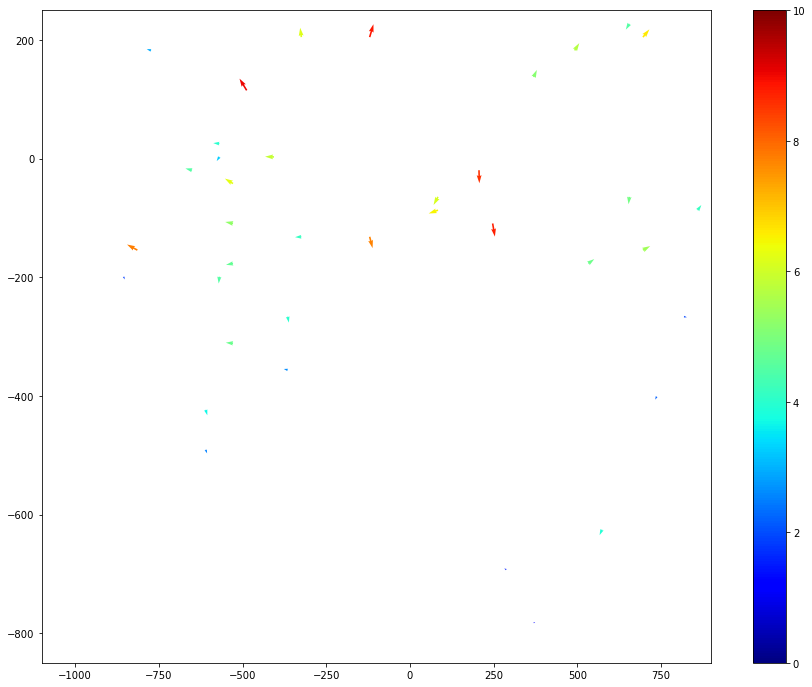

In [73]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.xlim(-1100, 900)
plt.ylim(-850, 250)

plt.quiver(xx-1100, -yy+250, u, -v, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 10)
plt.show()